In [1]:
library(dplyr)
library(ggplot2)
crime_data <- read.csv("crime_dataset_india.csv")
str(crime_data)
summary(crime_data)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


'data.frame':	40160 obs. of  14 variables:
 $ ï..Report.Number  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date.Reported     : Factor w/ 25546 levels "01-01-2020 05:00",..: 837 3 839 1 4 838 2 842 2518 1671 ...
 $ Date.of.Occurrence: Factor w/ 40160 levels "01-01-2020 00:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Time.of.Occurrence: Factor w/ 39886 levels "01-01-2020 01:11",..: 1 2 4 5 6 7 3 1306 1307 9 ...
 $ City              : Factor w/ 29 levels "Agra","Ahmedabad",..: 2 5 16 22 22 6 5 5 18 5 ...
 $ Crime.Code        : int  576 128 271 170 421 442 172 169 338 497 ...
 $ Crime.Description : Factor w/ 21 levels "ARSON","ASSAULT",..: 12 11 14 3 20 2 21 4 8 15 ...
 $ Victim.Age        : int  16 37 48 49 30 16 64 78 41 29 ...
 $ Victim.Gender     : Factor w/ 3 levels "F","M","X": 2 2 1 1 1 2 1 3 3 2 ...
 $ Weapon.Used       : Factor w/ 7 levels "Blunt Object",..: 1 7 1 3 6 3 4 4 1 4 ...
 $ Crime.Domain      : Factor w/ 4 levels "Fire Accident",..: 4 2 2 2 2 4 4 2 2 2 ...
 $ Police.Deployed   : int  13 

 ï..Report.Number          Date.Reported          Date.of.Occurrence
 Min.   :    1    03-01-2022 20:00:    7   01-01-2020 00:00:    1   
 1st Qu.:10041    05-03-2021 13:00:    7   01-01-2020 01:00:    1   
 Median :20081    24-12-2023 13:00:    7   01-01-2020 02:00:    1   
 Mean   :20081    29-03-2021 22:00:    7   01-01-2020 03:00:    1   
 3rd Qu.:30120    02-11-2022 11:00:    6   01-01-2020 04:00:    1   
 Max.   :40160    04-07-2021 13:00:    6   01-01-2020 05:00:    1   
                  (Other)         :40120   (Other)         :40154   
        Time.of.Occurrence        City         Crime.Code   
 14-10-2022 06:54:    3    Delhi    : 5400   Min.   :100.0  
 01-01-2024 04:20:    2    Mumbai   : 4415   1st Qu.:225.0  
 01-04-2022 08:46:    2    Bangalore: 3588   Median :349.0  
 01-04-2022 23:39:    2    Hyderabad: 2881   Mean   :349.4  
 01-08-2023 12:22:    2    Kolkata  : 2518   3rd Qu.:474.0  
 01-09-2021 06:59:    2    Chennai  : 2493   Max.   :599.0  
 (Other)         :401

In [2]:
#crimes by city
top_cities <- crime_data %>%
  count(City, sort = TRUE) %>%
  head(5)
print(top_cities)


# A tibble: 5 x 2
  City          n
  <fct>     <int>
1 Delhi      5400
2 Mumbai     4415
3 Bangalore  3588
4 Hyderabad  2881
5 Kolkata    2518


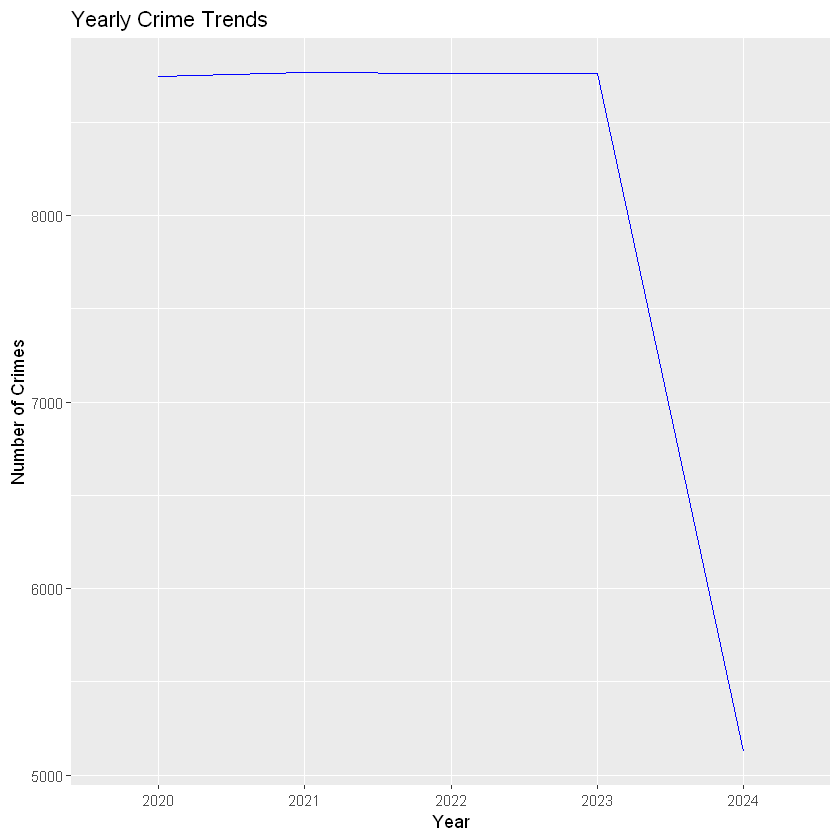

In [3]:
#Convert to Date type
crime_data$Date_Reported <- as.Date(crime_data$Date.Reported, format = "%d-%m-%Y %H:%M")

crime_data <- crime_data %>%
  mutate(Year = format(Date_Reported, "%Y"))

yearly_trend <- crime_data %>%
  count(Year)

ggplot(yearly_trend, aes(x = Year, y = n)) +
  geom_line(group = 1, color = "blue") +
  labs(title = "Yearly Crime Trends", x = "Year", y = "Number of Crimes")


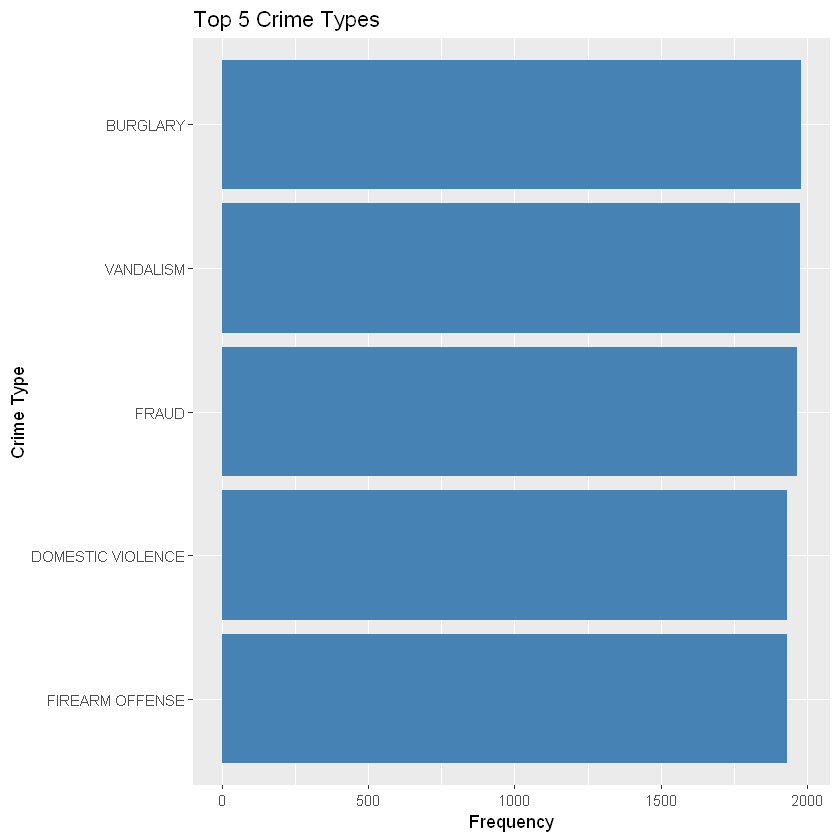

In [4]:
# Top 5 crime types
top_crimes <- crime_data %>%
  count(Crime.Description, sort = TRUE) %>%
  head(5)

ggplot(top_crimes, aes(x = reorder(Crime.Description, n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Top 5 Crime Types", x = "Crime Type", y = "Frequency")


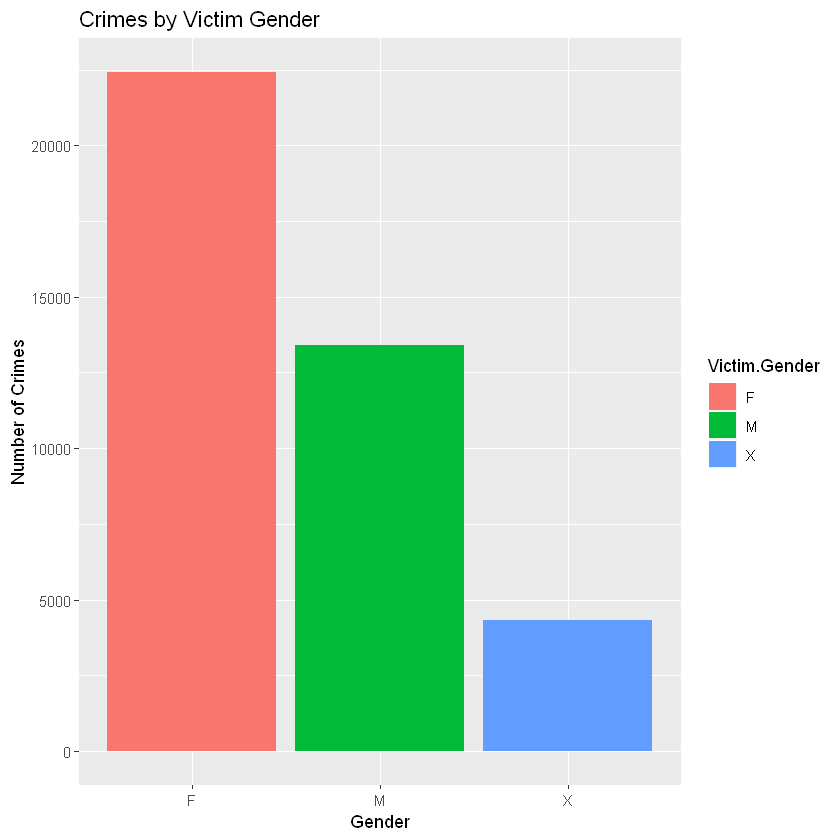

In [5]:
# Gender crimes
gender_analysis <- crime_data %>%
  count(Victim.Gender)

ggplot(gender_analysis, aes(x = Victim.Gender, y = n, fill = Victim.Gender)) +
  geom_bar(stat = "identity") +
  labs(title = "Crimes by Victim Gender", x = "Gender", y = "Number of Crimes")


# A tibble: 2 x 2
  Crime_Time_Category     n
  <chr>               <int>
1 Day                 20083
2 Night               20077


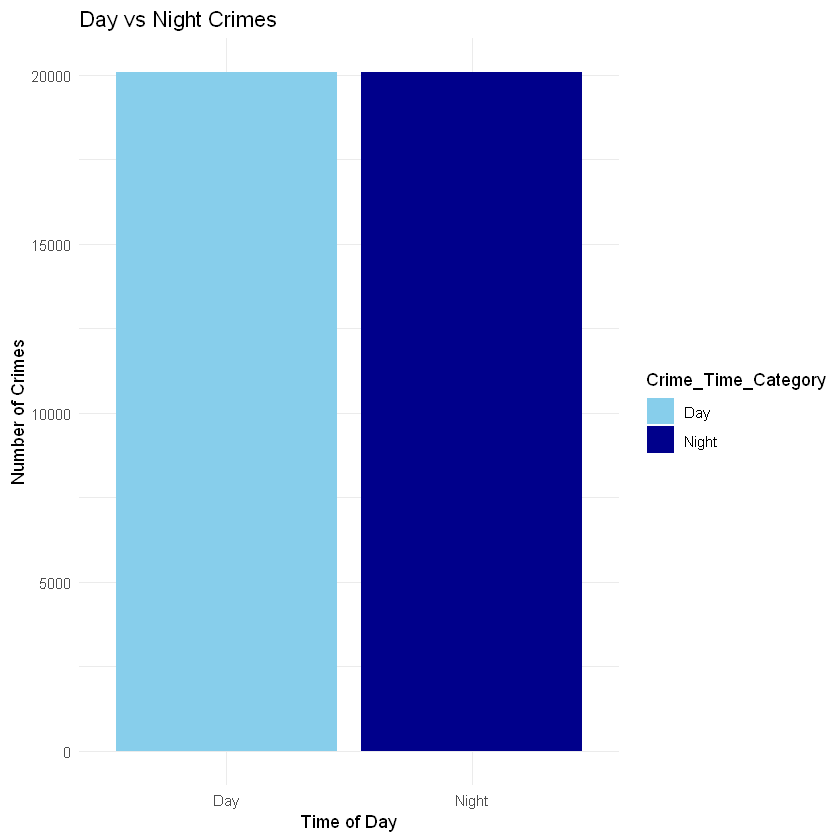

In [7]:
# Convert Time
crime_data$Time_Occurrence <- format(strptime(crime_data$Time.of.Occurrence, format = "%d-%m-%Y %H:%M"), "%H:%M")

# Classify crimes as Day or Night
crime_data <- crime_data %>%
  mutate(Crime_Time_Category = ifelse(as.numeric(substr(Time_Occurrence, 1, 2)) >= 6 &
                                        as.numeric(substr(Time_Occurrence, 1, 2)) < 18, 
                                      "Day", "Night"))

crime_time_summary <- crime_data %>%
  count(Crime_Time_Category)

print(crime_time_summary)

ggplot(crime_time_summary, aes(x = Crime_Time_Category, y = n, fill = Crime_Time_Category)) +
  geom_bar(stat = "identity") +
  labs(title = "Day vs Night Crimes", x = "Time of Day", y = "Number of Crimes") +
  theme_minimal() +
  scale_fill_manual(values = c("Day" = "skyblue", "Night" = "darkblue"))



Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



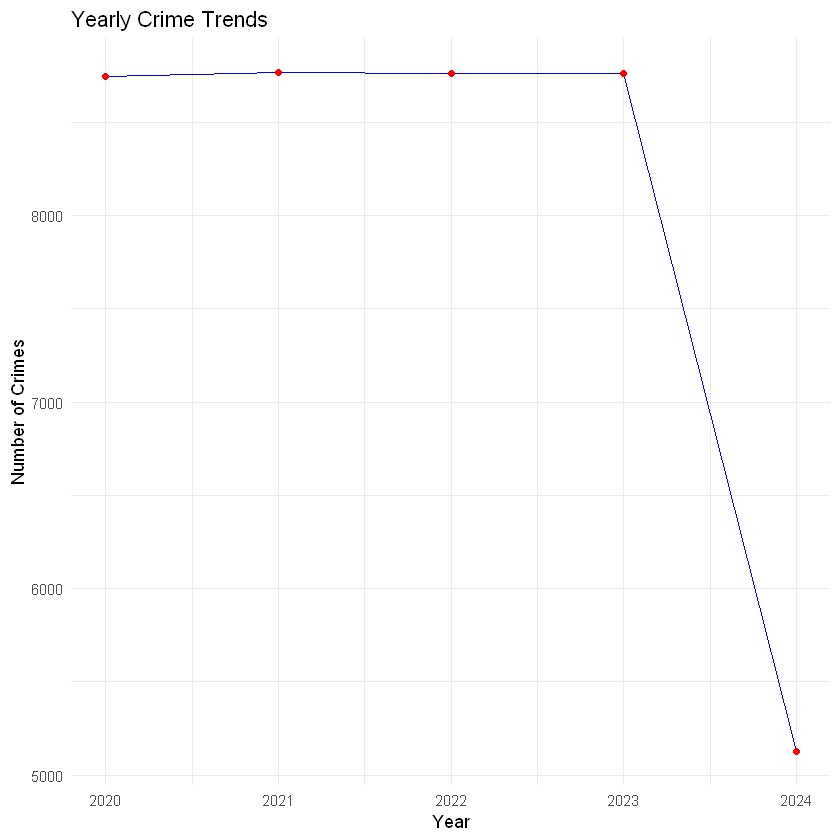

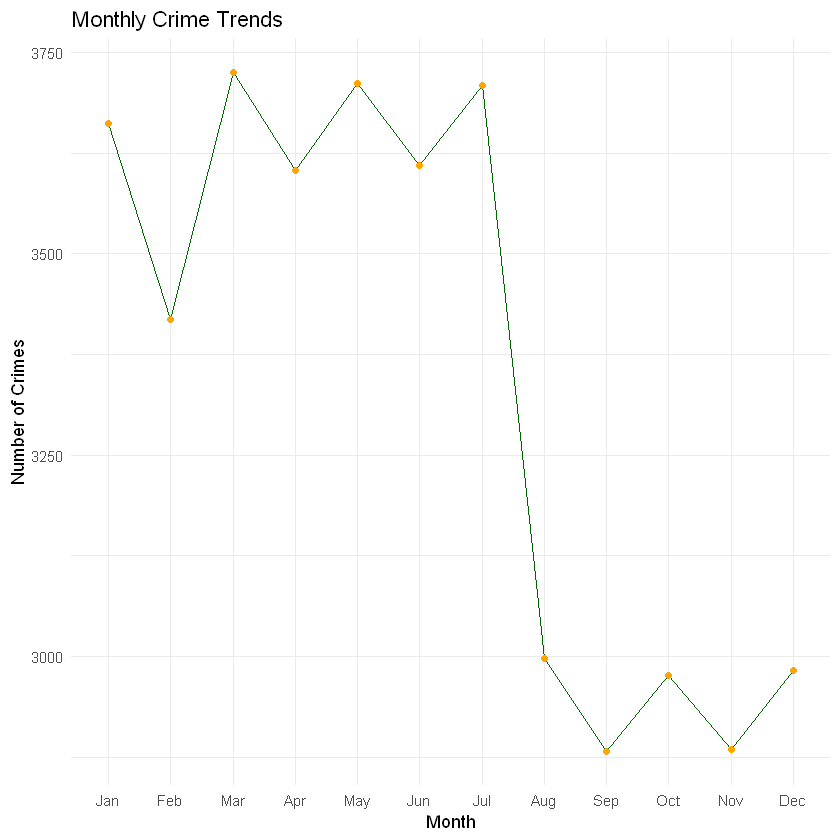

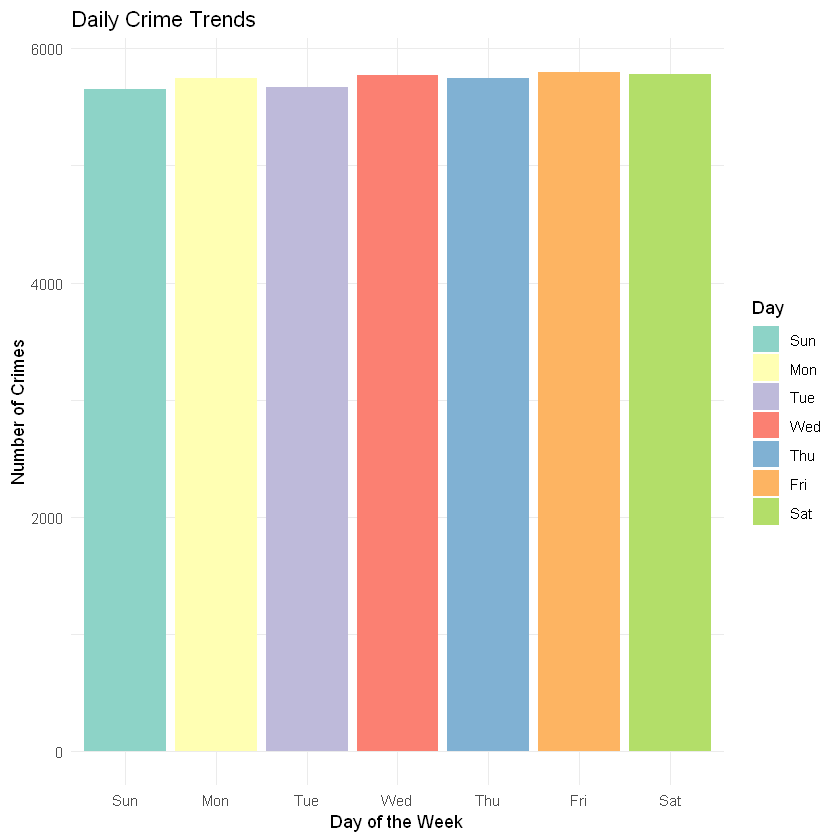

In [8]:

library(lubridate)

crime_data$Date_Reported <- as.Date(crime_data$Date.Reported, format = "%d-%m-%Y %H:%M")

crime_data <- crime_data %>%
  mutate(Year = year(Date_Reported),
         Month = month(Date_Reported, label = TRUE, abbr = TRUE),
         Day = wday(Date_Reported, label = TRUE, abbr = TRUE))

# Yearly Crime Trends
yearly_trends <- crime_data %>%
  count(Year)

ggplot(yearly_trends, aes(x = Year, y = n)) +
  geom_line(group = 1, color = "blue") +
  geom_point(color = "red") +
  labs(title = "Yearly Crime Trends", x = "Year", y = "Number of Crimes") +
  theme_minimal()

# Monthly Crime Trends
monthly_trends <- crime_data %>%
  count(Month)

ggplot(monthly_trends, aes(x = Month, y = n, group = 1)) +
  geom_line(color = "darkgreen") +
  geom_point(color = "orange") +
  labs(title = "Monthly Crime Trends", x = "Month", y = "Number of Crimes") +
  theme_minimal()

# Daily Crime Trends
daily_trends <- crime_data %>%
  count(Day)

ggplot(daily_trends, aes(x = Day, y = n, fill = Day)) +
  geom_bar(stat = "identity") +
  labs(title = "Daily Crime Trends", x = "Day of the Week", y = "Number of Crimes") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3")


Loading required package: lattice


[1] Actual    Predicted
<0 rows> (or 0-length row.names)


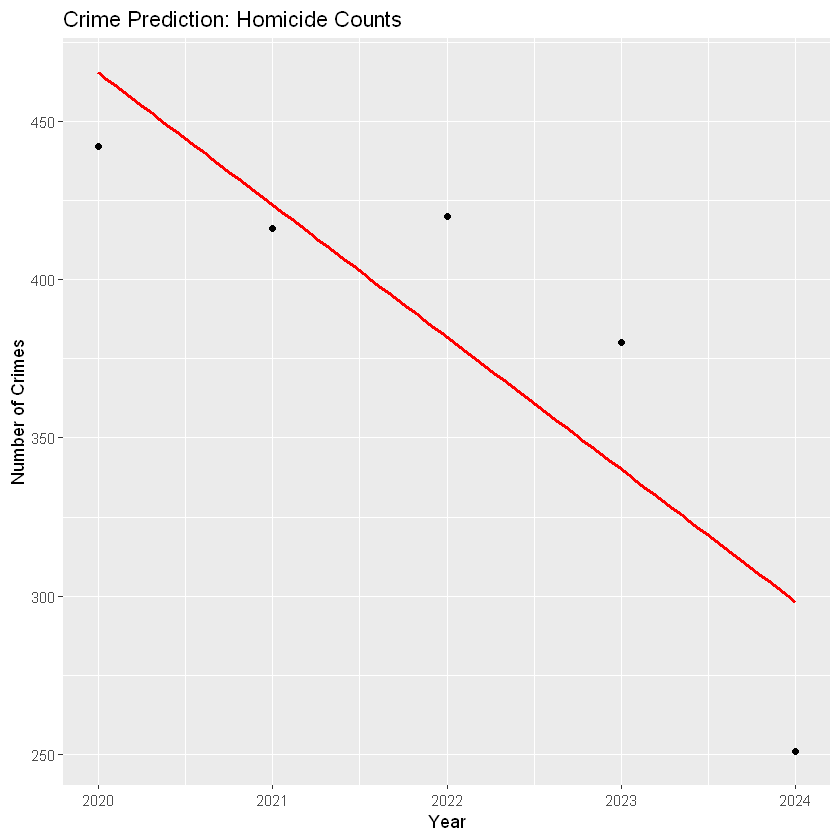

In [10]:
library(caret)

crime_data$Year <- as.numeric(format(as.Date(crime_data$Date.Reported, format = "%d-%m-%Y %H:%M"), "%Y"))

crime_by_type <- crime_data %>%
  group_by(Year, Crime.Description) %>%
  summarise(Count = n()) %>%
  ungroup()

# Filter for a single crime type (e.g., Homicide) for prediction
homicide_data <- crime_by_type %>%
  filter(Crime.Description == "HOMICIDE")

# Train-test split
set.seed(123)
train_index <- createDataPartition(homicide_data$Year, p = 0.8, list = FALSE)
train_data <- homicide_data[train_index, ]
test_data <- homicide_data[-train_index, ]

# Train a linear regression model
lm_model <- lm(Count ~ Year, data = train_data)

# Make predictions
predictions <- predict(lm_model, newdata = test_data)

# Compare actual vs predicted
comparison <- data.frame(Actual = test_data$Count, Predicted = predictions)
print(comparison)

# Plot the results
ggplot(homicide_data, aes(x = Year, y = Count)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Crime Prediction: Homicide Counts", x = "Year", y = "Number of Crimes")
